# Spearman Rank Coefficient with Errors

Dennis asked how I was handling errors when calculating the rank correlation between e.g. size ratio and B/T.  I wasn't accounting for errors, which is bad because the errors associated with the size ratio are quite variable.

To address this, I am implementing a monte-carlo error estimation for the spearman rank test.

In [74]:
import numpy as np
from pylab import *
%matplotlib inline
from scipy.stats.stats import spearmanr
from scipy.stats.mstats import normaltest
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("/Users/rfinn/Dropbox/pythonCode/")
sys.path.append("/anaconda/lib/python2.7/site-packages")
sys.path.append("/Users/rfinn/Ureka/variants/common/lib/python2.7/site-packages")


In [75]:
def spearman_with_errors(x,y,yerr,Nmc=1000,plotflag=False):
    ysim=np.zeros(Nmc,'f')
    rhosim=np.zeros(Nmc,'f')
    psim=np.zeros(Nmc,'f')
    for i in range(Nmc):
        ysim=np.random.normal(y,scale=yerr,size=len(y))
        rhosim[i],psim[i] = spearmanr(x,ysim)
    cave=np.mean(rhosim)
    cstd=np.std(rhosim)
    q1=50-34 # mean minus one std
    lower=np.percentile(rhosim,q1)
    q2=50+34 # mean minus one std
    upper=np.percentile(rhosim,q2)
    print 'mean = %5.2f, std = %5.2f'%(cave,cstd)
    print 'confidence interval from sorted list of MC fit values:'
    print 'lower = %5.2f (%5.2f), upper = %5.2f (%5.2f)'%(lower,cave-cstd, upper,cave+cstd)
    k,pnorm=normaltest(rhosim)
    print 'probability that distribution is normal = %5.2f'%(pnorm)
    if plotflag:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.hist(rhosim,bins=10,normed=True)
        plt.xlabel(r'$Spearman \ \rho $')
        plt.axvline(x=cave,ls='-',color='k')
        plt.axvline(x=lower,ls='--',color='k')
        plt.axvline(x=upper,ls='--',color='k')
        plt.subplot(1,2,2)
        plt.hist(np.log10(psim),bins=10,normed=True)
        plt.xlabel(r'$\log_{10}(p \ value)$')
        plt.figure()
        plt.hexbin(rhosim,np.log10(psim))
        plt.xlabel(r'$Spearman \ \rho $')
        plt.ylabel(r'$\log_{10}(p \ value)$')
    return rhosim,psim

In [76]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py

%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all


## The Plot Dennis is referring to

Here is the plot of relative size vs. B/T.  The right panel now shows the weighted mean in 5 bins vs B/T, so that is ok, although I am still not sure how to properly calculate the error in the weighted mean.



[ 0.12        0.18000001  0.14        0.          0.34        0.05        0.22
  0.06        0.08        0.05        0.19        0.17        0.1         0.09
  0.02        0.          0.17        0.12        0.01        0.16        0.03
  0.07        0.09        0.40000001  0.1         0.15000001  0.          0.06
  0.27000001  0.11        0.11        0.03        0.23999999  0.17        0.12
  0.23        0.18000001  0.14        0.06        0.12        0.08        0.1
  0.25999999  0.02        0.04        0.09        0.          0.02        0.
  0.          0.69        0.19        0.03        0.02        0.1         0.02
  0.19        0.05        0.          0.19        0.03        0.64999998
  0.13        0.5         0.12        0.25999999  0.40000001  0.28999999
  0.          0.23      ] [ 0.47052389  0.38414401  0.23821501  0.77706665  0.20416158  0.76825398
  0.56480855  0.5804944   0.66424572  0.85999548  0.28608885  0.54184186
  0.36836162  0.61810166  0.80757105  0.47963026  0.4

NameError: global name 'spearman_with_errors' is not defined

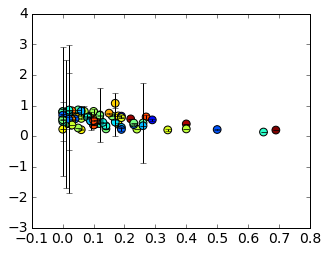

In [73]:
s.plotsizeBTblue()

## Fixing the spearman rank correlation

I still need to account for errors when calculating the rank correlation coefficient in the left panels.  For this, I am using a monte carlo approach to calculate the spearman rank correlation for many random realizations of the data.  I am assuming that the galfit errors are normally distributed.  This is likely incorrect, but I'm not sure how to handle it otherwise.

In [24]:
flag = s.sampleflag & ~s.agnflag & s.gim2dflag
membflag = flag & s.membflag
fieldflag = flag & ~s.membflag

mean = -0.36, std =  0.08
confidence interval from sorted list of MC fit values:
lower = -0.44 (-0.44), upper = -0.28 (-0.28)
probability that distribution is normal =  0.02


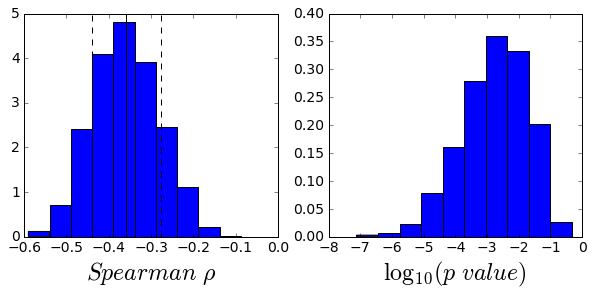

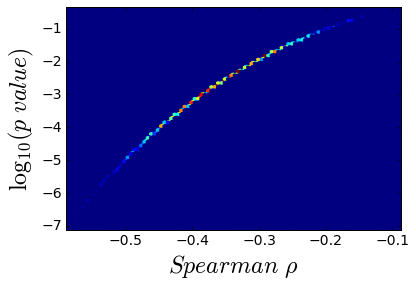

In [65]:
t=spearman_with_errors(s.s.B_T_r[membflag], s.s.SIZE_RATIO[membflag],s.s.SIZE_RATIOERR[membflag],Nmc=1000,plotflag=True)

mean = -0.41, std =  0.05
confidence interval from sorted list of MC fit values:
lower = -0.46 (-0.46), upper = -0.35 (-0.36)
probability that distribution is normal =  0.00


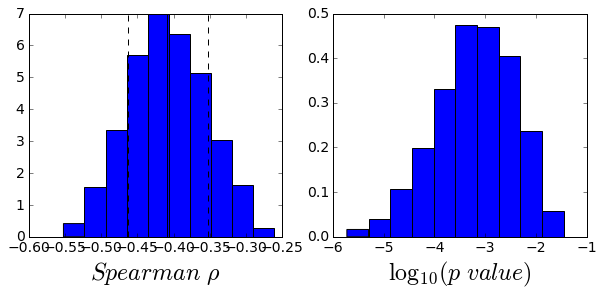

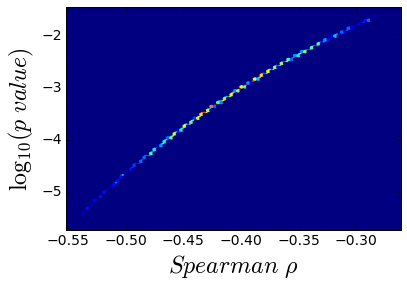

In [61]:
t=spearman_with_errors(s.s.B_T_r[fieldflag], s.s.SIZE_RATIO[fieldflag],s.s.SIZE_RATIOERR[fieldflag],plotflag=True)

## Result

* The rho values are smaller, but the correlations are still significant.
* The correlation is slightly stronger for field galaxies than member galaxies.